In [ ]:
# !pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls ~/.kaggle/

kaggle.json


In [ ]:
!kaggle competitions download -c cifar-10

 89% 638M/715M [00:03<00:01, 45.5MB/s]
100% 715M/715M [00:03<00:00, 194MB/s] 


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
file_name='/content/cifar-10.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 33.9 MB/s eta 0:00:00


In [ ]:
import py7zr
archive=py7zr.SevenZipFile('/content/train.7z','r')
archive.extractall()
print('Done')

Done


In [ ]:
import py7zr
archive=py7zr.SevenZipFile('/content/test.7z','r')
archive.extractall()
print('Done')

Done


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from PIL import Image

In [ ]:
filename=os.listdir('/content/train')
len(filename)

50000

In [ ]:
filename1=os.listdir('/content/test')
filename1[0:5]

['211120.png', '285038.png', '214625.png', '111727.png', '195026.png']

In [ ]:
print(filename[0:5])
print(filename[-5:])

['15879.png', '1376.png', '30958.png', '33851.png', '11746.png']
['9005.png', '25195.png', '14827.png', '26886.png', '35794.png']


In [ ]:
label_df=pd.read_csv('/content/trainLabels.csv')

In [ ]:
label_df.shape

(50000, 2)

In [ ]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
label_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
label_dict={'airplane':0,'automobile':1,'bird':2,'cat':3,'dog':4,'deer':5,'horse':6,'frog':7,'ship':8,'truck':9}

In [ ]:
label=[label_dict[i] for i in label_df['label']]

In [ ]:
label[0:4]

[7, 9, 9, 5]

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

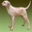

In [ ]:
img=cv2.imread('/content/train/10000.png')
cv2_imshow(img)

In [ ]:
id_list=list(label_df['id'])

In [ ]:
id_list[0:5]

[1, 2, 3, 4, 5]

## Image Processing

In [ ]:
train_data_folder='/content/train'
data=[]

for id in id_list:
  image=Image.open(os.path.join(train_data_folder,str(id)+'.png'))
  # image=image.resize((32,32))
  image=np.array(image)
  data.append(image)



In [ ]:
len(data)

50000

In [ ]:
type(data)

list

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
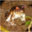

In [ ]:
data[0]

In [ ]:
x=np.array(data)
y=np.array(label)

In [ ]:
print(x.shape)

(50000, 32, 32, 3)


In [ ]:
print(y.shape)

(50000,)


train test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x.shape,x_train.shape,x_test.shape

((50000, 32, 32, 3), (40000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
# scaling the data
x_train_scale=x_train/255
y_train_scale=y_train/255

In [ ]:
#x_train_scale

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
num_of_classes=10

#setting up the layers of the neural network

In [ ]:
# model=keras.Sequential(
#     [
#        keras.layers.Flatten(input_shape=(32,32,3)),
#     keras.layers.Dense(128,activation='relu'),
#     keras.layers.Dense(num_of_classes,activation='softmax')
#     ]
# )

In [ ]:
#compile the neural network
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# model.fit(x_train_scale,y_train,validation_split=0.1,epochs=10)

In [ ]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))
convolutional.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional)
model.add(Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))
model.add(layers.Dropout(0.5))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(x_train_scale,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 461s 366ms/step - acc: 0.2048 - loss: 8.6194 - val_acc: 0.6848 - val_loss: 1.0818
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 424s 374ms/step - acc: 0.3568 - loss: 7.8348 - val_acc: 0.8127 - val_loss: 0.6795
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 420s 373ms/step - acc: 0.4046 - loss: 7.4415 - val_acc: 0.8690 - val_loss: 0.4876
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 419s 373ms/step - acc: 0.4287 - loss: 7.1564 - val_acc: 0.8825 - val_loss: 0.4505
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 373ms/step - acc: 0.4431 - loss: 6.9165 - val_acc: 0.9047 - val_loss: 0.3676
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 373ms/step - acc: 0.4496 - loss: 6.6607 - val_acc: 0.9120 - val_loss: 0.3347
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 411s 365ms/step - acc: 0.4662 - loss: 6.3243 - val_acc: 0.9133 - val_loss: 0.3518
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 412s 366ms/step - acc: 0.4634 - loss: 6.1465 - val_acc: 0.9260 - val_loss: 0.3241
Epoch 9/

In [ ]:
model.save('object_detection_model.h5')

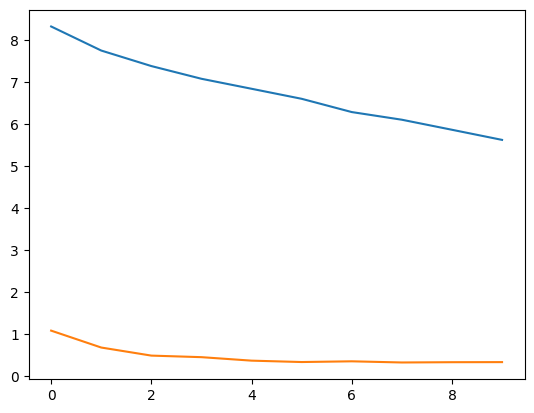

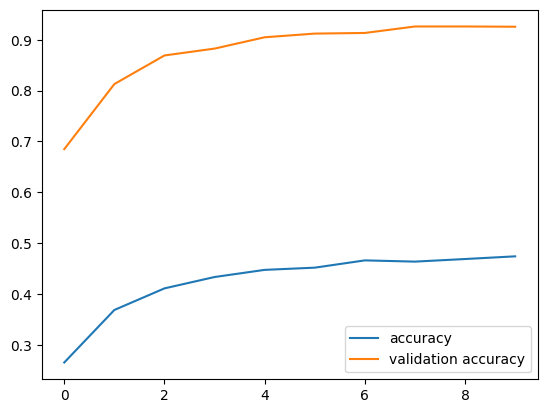

In [ ]:
h=history
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.show()

plt.plot(h.history['acc'],label='accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

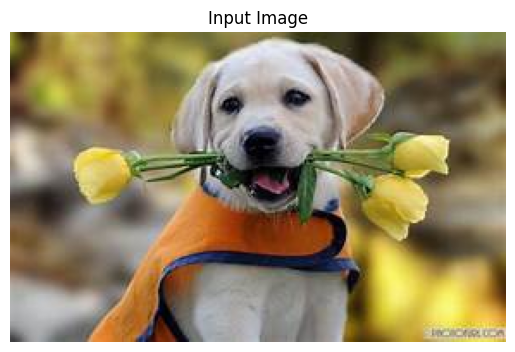

In [ ]:

import cv2
import matplotlib.pyplot as plt

# Read image in BGR format
input_image = cv2.imread('/content/dog.jpeg')

# Convert BGR to RGB for correct color display
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')  # Hides axis
plt.show()


In [ ]:

# Image path
input_image_path = '/content/horse.jpeg'

# Read and preprocess the image
input_image = cv2.imread(input_image_path)
input_image_resized = cv2.resize(input_image, (32, 32))
input_image_scaled = input_image_resized / 255.0

# Add batch dimension: shape becomes (1, 32, 32, 3)
input_image_scaled = np.expand_dims(input_image_scaled, axis=0)

# Predict
input_prediction = model.predict(input_image_scaled)
predicted_index = np.argmax(input_prediction)

# Class label interpretation
if predicted_index == 0:
    print("The image is classified as an airplane.")
elif predicted_index == 1:
    print("The image is classified as an automobile.")
elif predicted_index == 2:
    print("The image is classified as a bird.")
elif predicted_index == 3:
    print("The image is classified as a cat.")
elif predicted_index == 4:
    print("The image is classified as a dog.")
elif predicted_index == 5:
    print("The image is classified as a deer.")
elif predicted_index == 6:
    print("The image is classified as a horse.")
elif predicted_index == 7:
    print("The image is classified as a frog.")
elif predicted_index == 8:
    print("The image is classified as a ship.")
elif predicted_index == 9:
    print("The image is classified as a truck.")
else:
    print("Unknown class.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The image is classified as an airplane.
